# 1) Imports & Drive Mount

In [1]:
import os
import pandas as pd
from google.colab import drive

drive.mount('/content/drive')


Mounted at /content/drive


# EDA FOR THE DATA BEFORE STARTING CLEANING

CONFIGURATION

COLLECTING STUDENT CSV FILES
Found 121 CSV files from 106 students

ANALYZING INDIVIDUAL SUBMISSIONS

Successfully loaded: 119 files
Failed to load: 2 files

SUBMISSION SIZE ANALYSIS

Row count statistics:
Mean rows per student: 13.08
Median rows per student: 10.00
Min rows: 9
Max rows: 77
Total rows across all students: 1557


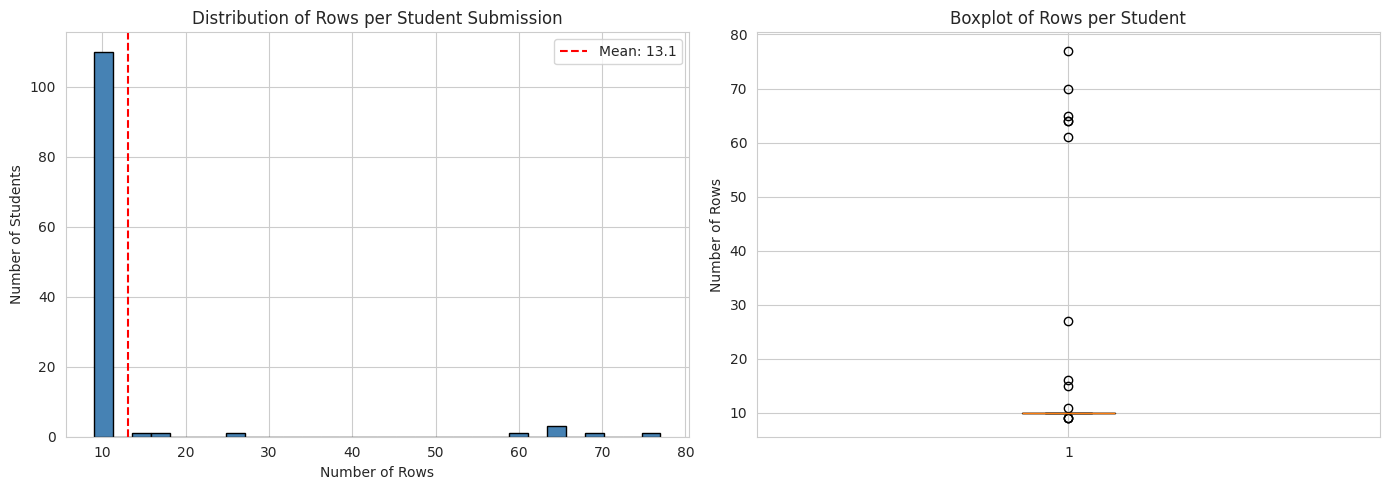


UNUSUAL SUBMISSION SIZES

Found 13 students with unusual submission sizes:
Student                              File  Rows
1203048               2935939-1203048.csv     9
1210420               2938501-1210420.csv    70
1211088               2937876-1211088.csv    16
1213215               2938277-1213215.csv    77
1220014 2938005-1220014_Maisam_phase1.csv    15
1220060               2938169-1220060.csv    64
1220092               2938278-1220092.csv     9
1220175               2938584-1220175.csv    61
1220200               2938392-1220200.csv    27
1220204               2935770-1220204.csv    65
1220447               2938036-1220447.csv     9
1220829               2937267-1220829.csv    11
1221998               2938660-1221998.csv    64

COLUMN NAME ANALYSIS

Total column occurrences: 954
Unique column names (case-insensitive): 70

Top 20 most common column names:
  country                       :  110 occurrences (90.9%)
  weather                       :  110 occurrences (90.9%)
  se

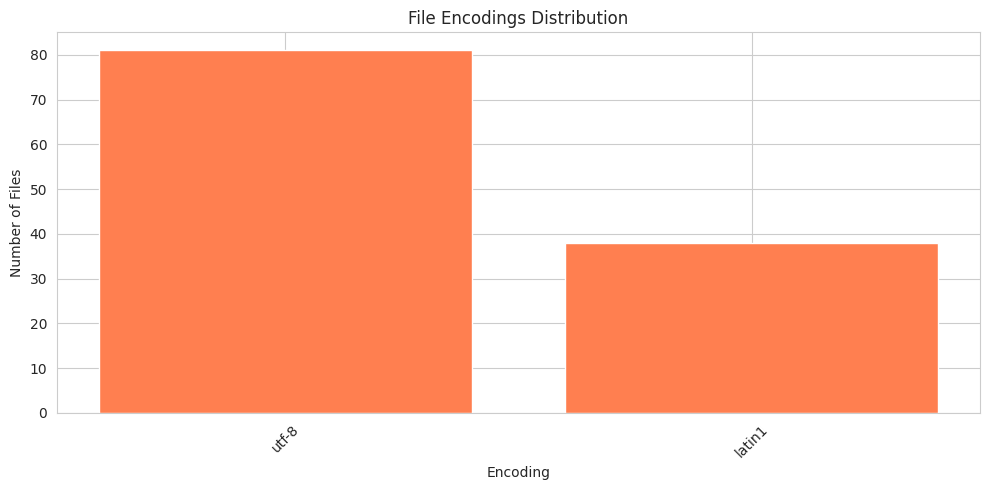


COLUMN COUNT ANALYSIS

Column count distribution:
Columns
1       4
2       1
3       1
8     107
9       4
11      1
42      1
Name: count, dtype: int64


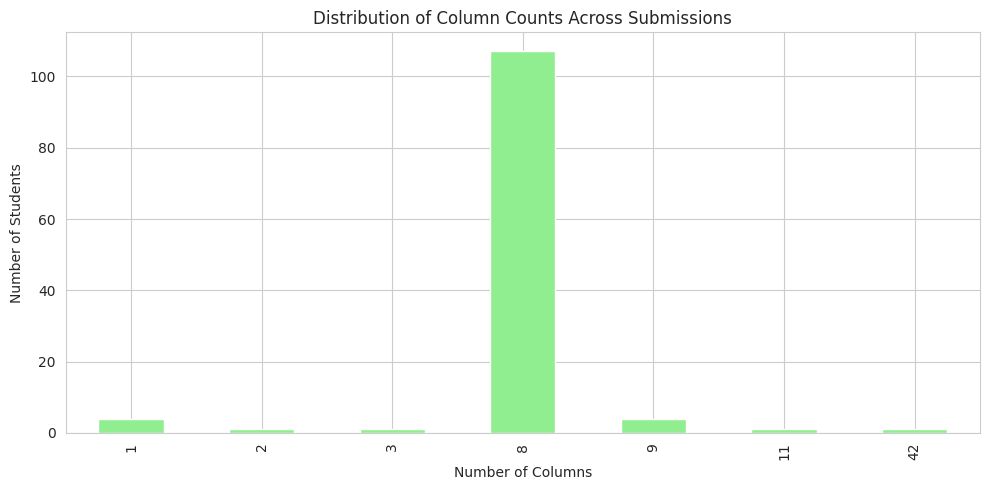


DETAILED COLUMN STRUCTURE BY STUDENT

Found 23 unique column structures

Top 5 most common column structures:

  Structure #1 (65 students):
    Columns: activity, country, description, image url, mood/emotion, season, time of day, weather
    Students: 1161937, 1200242, 1181804, 1201169, 1201208 ...

  Structure #2 (16 students):
    Columns: activity, country, description, image url, mood, season, time of day, weather
    Students: 1202223, 1210904, 1210904, 1210904, 1220092 ...

  Structure #3 (8 students):
    Columns: activity, country, description, imageurl, mood, season, timeofday, weather
    Students: 1210582, 1212564, 1212564, 1212564, 1220041 ...

  Structure #4 (4 students):
    Columns: pk
    Students: 1210420, 1213215, 1220060, 1221998

  Structure #5 (3 students):
    Columns: activity, country, description, imageurl, mood/emotion, season, timeofday, weather
    Students: 1211234, 1212482, 1212482

SAMPLE DATA INSPECTION (First 3 Valid Files)

Student: 1161937
File: 

In [2]:
# Exploratory Data Analysis for RAW Student Submissions (Before Cleaning)


import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter, defaultdict
import warnings
warnings.filterwarnings('ignore')

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 6)

# ============================================================================
# 1. CONFIGURATION
# ============================================================================
print("="*80)
print("CONFIGURATION")
print("="*80)

BASE_DIR = "/content/drive/MyDrive/Assignment3_ENCS5341/compressed-attachments"
EXCLUDE_DIRS = {"processed", "processed_files"}
EXCLUDE_FILES = {"all_students_final.csv", "all_students_combined_and_cleaned.csv"}

# ============================================================================
# 2. COLLECT ALL STUDENT CSV FILES
# ============================================================================
print("\n" + "="*80)
print("COLLECTING STUDENT CSV FILES")
print("="*80)

def collect_student_csvs(base_dir):
    csvs = []
    students = []
    for d in os.listdir(base_dir):
        if d.lower() in EXCLUDE_DIRS:
            continue

        dpath = os.path.join(base_dir, d)
        if not os.path.isdir(dpath):
            continue

        for f in os.listdir(dpath):
            if f.lower().endswith(".csv") and f.lower() not in EXCLUDE_FILES:
                csvs.append(os.path.join(dpath, f))
                students.append(d)

    return csvs, students

csv_paths, student_names = collect_student_csvs(BASE_DIR)
print(f"Found {len(csv_paths)} CSV files from {len(set(student_names))} students")

# ============================================================================
# 3. ANALYZE EACH STUDENT SUBMISSION
# ============================================================================
print("\n" + "="*80)
print("ANALYZING INDIVIDUAL SUBMISSIONS")
print("="*80)

student_stats = []
all_columns = []
encodings_used = []
file_issues = []

ENCODINGS = ['utf-8', 'latin1', 'iso-8859-1', 'cp1252']

for idx, (csv_path, student) in enumerate(zip(csv_paths, student_names)):
    stats = {
        'Student': student,
        'File': os.path.basename(csv_path),
        'Rows': 0,
        'Columns': 0,
        'Column_Names': [],
        'Encoding': None,
        'Has_Errors': False,
        'Error_Message': None
    }

    # Try to load with different encodings
    loaded = False
    for enc in ENCODINGS:
        try:
            df = pd.read_csv(csv_path, encoding=enc, on_bad_lines='skip')
            stats['Rows'] = len(df)
            stats['Columns'] = len(df.columns)
            stats['Column_Names'] = df.columns.tolist()
            stats['Encoding'] = enc
            all_columns.extend(df.columns.tolist())
            encodings_used.append(enc)
            loaded = True
            break
        except Exception as e:
            continue

    if not loaded:
        stats['Has_Errors'] = True
        stats['Error_Message'] = "Could not read file"
        file_issues.append(stats)

    student_stats.append(stats)

# Convert to DataFrame
stats_df = pd.DataFrame(student_stats)

print(f"\nSuccessfully loaded: {(~stats_df['Has_Errors']).sum()} files")
print(f"Failed to load: {stats_df['Has_Errors'].sum()} files")

# ============================================================================
# 4. SUBMISSION SIZE ANALYSIS
# ============================================================================
print("\n" + "="*80)
print("SUBMISSION SIZE ANALYSIS")
print("="*80)

valid_stats = stats_df[~stats_df['Has_Errors']]

print(f"\nRow count statistics:")
print(f"Mean rows per student: {valid_stats['Rows'].mean():.2f}")
print(f"Median rows per student: {valid_stats['Rows'].median():.2f}")
print(f"Min rows: {valid_stats['Rows'].min()}")
print(f"Max rows: {valid_stats['Rows'].max()}")
print(f"Total rows across all students: {valid_stats['Rows'].sum()}")

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.hist(valid_stats['Rows'], bins=30, color='steelblue', edgecolor='black')
plt.title('Distribution of Rows per Student Submission')
plt.xlabel('Number of Rows')
plt.ylabel('Number of Students')
plt.axvline(valid_stats['Rows'].mean(), color='red', linestyle='--', label=f'Mean: {valid_stats["Rows"].mean():.1f}')
plt.legend()

plt.subplot(1, 2, 2)
plt.boxplot(valid_stats['Rows'])
plt.title('Boxplot of Rows per Student')
plt.ylabel('Number of Rows')

plt.tight_layout()
plt.show()

# Students with unusual submission sizes
print("\n" + "="*80)
print("UNUSUAL SUBMISSION SIZES")
print("="*80)

q1 = valid_stats['Rows'].quantile(0.25)
q3 = valid_stats['Rows'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = valid_stats[(valid_stats['Rows'] < lower_bound) | (valid_stats['Rows'] > upper_bound)]
print(f"\nFound {len(outliers)} students with unusual submission sizes:")
print(outliers[['Student', 'File', 'Rows']].to_string(index=False))

# ============================================================================
# 5. COLUMN NAME ANALYSIS
# ============================================================================
print("\n" + "="*80)
print("COLUMN NAME ANALYSIS")
print("="*80)

# Count unique column names (case-insensitive)
column_counter = Counter([col.strip().lower() for col in all_columns])
print(f"\nTotal column occurrences: {len(all_columns)}")
print(f"Unique column names (case-insensitive): {len(column_counter)}")

print("\nTop 20 most common column names:")
for col, count in column_counter.most_common(20):
    print(f"  {col:30s}: {count:4d} occurrences ({count/len(csv_paths)*100:.1f}%)")

# Column name variations
print("\n" + "="*80)
print("COLUMN NAME VARIATIONS")
print("="*80)

# Group similar column names
column_groups = defaultdict(list)
for col in column_counter.keys():
    if 'description' in col:
        column_groups['description'].append((col, column_counter[col]))
    elif 'url' in col or 'image' in col:
        column_groups['image_url'].append((col, column_counter[col]))
    elif 'country' in col:
        column_groups['country'].append((col, column_counter[col]))
    elif 'weather' in col:
        column_groups['weather'].append((col, column_counter[col]))
    elif 'time' in col:
        column_groups['time'].append((col, column_counter[col]))
    elif 'season' in col:
        column_groups['season'].append((col, column_counter[col]))
    elif 'activity' in col or 'activities' in col:
        column_groups['activity'].append((col, column_counter[col]))
    elif 'mood' in col or 'emotion' in col:
        column_groups['mood'].append((col, column_counter[col]))

for group, variations in column_groups.items():
    print(f"\n{group.upper()} variations:")
    for col, count in sorted(variations, key=lambda x: x[1], reverse=True):
        print(f"  {col:30s}: {count:4d}")

# ============================================================================
# 6. ENCODING ANALYSIS
# ============================================================================
print("\n" + "="*80)
print("ENCODING ANALYSIS")
print("="*80)

encoding_counts = Counter(encodings_used)
print("\nEncodings used:")
for enc, count in encoding_counts.most_common():
    print(f"  {enc:15s}: {count:4d} files ({count/len(csv_paths)*100:.1f}%)")

plt.figure(figsize=(10, 5))
encs = list(encoding_counts.keys())
counts = list(encoding_counts.values())
plt.bar(encs, counts, color='coral')
plt.title('File Encodings Distribution')
plt.xlabel('Encoding')
plt.ylabel('Number of Files')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ============================================================================
# 7. COLUMN COUNT ANALYSIS
# ============================================================================
print("\n" + "="*80)
print("COLUMN COUNT ANALYSIS")
print("="*80)

column_count_dist = valid_stats['Columns'].value_counts().sort_index()
print("\nColumn count distribution:")
print(column_count_dist)

plt.figure(figsize=(10, 5))
column_count_dist.plot(kind='bar', color='lightgreen')
plt.title('Distribution of Column Counts Across Submissions')
plt.xlabel('Number of Columns')
plt.ylabel('Number of Students')
plt.tight_layout()
plt.show()

# ============================================================================
# 8. DETAILED COLUMN STRUCTURE ANALYSIS
# ============================================================================
print("\n" + "="*80)
print("DETAILED COLUMN STRUCTURE BY STUDENT")
print("="*80)

# Group students by their column structure
column_signatures = defaultdict(list)
for idx, row in valid_stats.iterrows():
    signature = tuple(sorted([c.strip().lower() for c in row['Column_Names']]))
    column_signatures[signature].append(row['Student'])

print(f"\nFound {len(column_signatures)} unique column structures")
print("\nTop 5 most common column structures:")
sorted_sigs = sorted(column_signatures.items(), key=lambda x: len(x[1]), reverse=True)

for i, (sig, students) in enumerate(sorted_sigs[:5], 1):
    print(f"\n  Structure #{i} ({len(students)} students):")
    print(f"    Columns: {', '.join(sig)}")
    print(f"    Students: {', '.join(students[:5])}" + (" ..." if len(students) > 5 else ""))

# ============================================================================
# 9. SAMPLE DATA INSPECTION
# ============================================================================
print("\n" + "="*80)
print("SAMPLE DATA INSPECTION (First 3 Valid Files)")
print("="*80)

for idx, (csv_path, student) in enumerate(zip(csv_paths[:3], student_names[:3])):
    print(f"\n{'='*60}")
    print(f"Student: {student}")
    print(f"File: {os.path.basename(csv_path)}")
    print(f"{'='*60}")

    try:
        df = pd.read_csv(csv_path, encoding='utf-8', on_bad_lines='skip')
        print(f"\nShape: {df.shape}")
        print(f"\nColumns: {df.columns.tolist()}")
        print(f"\nFirst 3 rows:")
        print(df.head(3))
        print(f"\nData types:")
        print(df.dtypes)
        print(f"\nMissing values:")
        print(df.isnull().sum())
    except Exception as e:
        print(f"Error reading file: {e}")

# ============================================================================
# 10. DATA QUALITY ISSUES
# ============================================================================
print("\n" + "="*80)
print("POTENTIAL DATA QUALITY ISSUES")
print("="*80)

issues_summary = {
    'Files with errors': stats_df['Has_Errors'].sum(),
    'Files with < 5 rows': (valid_stats['Rows'] < 5).sum(),
    'Files with > 20 rows': (valid_stats['Rows'] > 20).sum(),
    'Files with wrong column count': (valid_stats['Columns'] != 8).sum(),
    'Unique column structures': len(column_signatures),
    'Students with outlier row counts': len(outliers)
}

print("\nIssues detected:")
for issue, count in issues_summary.items():
    print(f"  {issue:40s}: {count:4d}")

# ============================================================================
# 11. SUMMARY REPORT
# ============================================================================
print("\n" + "="*80)
print("SUMMARY REPORT")
print("="*80)

report = []
report.append("="*80)
report.append("RAW STUDENT SUBMISSIONS - EDA SUMMARY")
report.append("="*80)
report.append(f"\nTotal CSV files found: {len(csv_paths)}")
report.append(f"Successfully loaded: {(~stats_df['Has_Errors']).sum()}")
report.append(f"Failed to load: {stats_df['Has_Errors'].sum()}")
report.append(f"\nTotal rows across all submissions: {valid_stats['Rows'].sum()}")
report.append(f"Average rows per student: {valid_stats['Rows'].mean():.2f}")
report.append(f"Median rows per student: {valid_stats['Rows'].median():.2f}")
report.append(f"\nUnique column names found: {len(column_counter)}")
report.append(f"Unique column structures: {len(column_signatures)}")
report.append("\n" + "="*80)
report.append("TOP ISSUES")
report.append("="*80)
for issue, count in issues_summary.items():
    if count > 0:
        report.append(f"{issue}: {count}")

report_text = "\n".join(report)
print(report_text)

# Save report
output_dir = os.path.join(BASE_DIR, "processed_files")
os.makedirs(output_dir, exist_ok=True)
report_path = os.path.join(output_dir, "RAW_DATA_EDA_REPORT.txt")

with open(report_path, 'w') as f:
    f.write(report_text)

print(f"\n✓ Report saved to: {report_path}")

# Save detailed stats
stats_path = os.path.join(output_dir, "student_submission_stats.csv")
stats_df.to_csv(stats_path, index=False)
print(f"✓ Detailed stats saved to: {stats_path}")

print("\n" + "="*80)
print("RAW DATA EDA COMPLETE!")
print("="*80)

# 2) Configuration

In [3]:
BASE_DIR = "/content/drive/MyDrive/Assignment3_ENCS5341/compressed-attachments"
OUTPUT_DIR = os.path.join(BASE_DIR, "processed_files")

EXCLUDE_DIRS = {"processed", "processed_files"}
EXCLUDE_FILES = {
    "all_students_final.csv",
    "all_students_combined_and_cleaned.csv"
}

ENCODINGS = ['utf-8', 'latin1', 'iso-8859-1', 'cp1252']

DESCRIPTION_COLS = {
    'description', 'description:', 'describtion', 'description '
}

CANONICAL_COLUMNS = [
    'Image URL', 'Description', 'Country',
    'Weather', 'Time of Day', 'Season',
    'Activity', 'Mood/Emotion'
]

COLUMN_MAPPING = {
    'image url': 'Image URL',
    'image_url': 'Image URL',
    'url': 'Image URL',

    'description': 'Description',
    'description:': 'Description',
    'describtion': 'Description',

    'country': 'Country',
    'weather': 'Weather',
    'time of day': 'Time of Day',
    'season': 'Season',
    'activity': 'Activity',
    'mood/emotion': 'Mood/Emotion',
    'mood': 'Mood/Emotion'
}

ALLOWED_WEATHER = {'sunny', 'cloudy', 'rainy', 'snowy', 'clear', 'not clear'}
ALLOWED_TIME = {'morning', 'afternoon', 'evening', 'night', 'not clear'}
ALLOWED_SEASON = {'spring', 'summer', 'fall', 'autumn', 'winter', 'not clear'}


#3) Functions

###CSV Discovery

In [4]:
def collect_student_csvs(base_dir):
    csvs = []
    for d in os.listdir(base_dir):
        if d.lower() in EXCLUDE_DIRS:
            continue

        dpath = os.path.join(base_dir, d)
        if not os.path.isdir(dpath):
            continue

        for f in os.listdir(dpath):
            if f.lower().endswith(".csv") and f.lower() not in EXCLUDE_FILES:
                csvs.append(os.path.join(dpath, f))

    return csvs


###Robust CSV Loader + Description Normalization

In [5]:
def load_csv(path):
    for enc in ENCODINGS:
        try:
            df = pd.read_csv(
                path,
                encoding=enc,
                engine='python',
                on_bad_lines='skip',
                index_col=None
            ).reset_index(drop=True)

            # Normalize description column
            for col in df.columns:
                if col.strip().lower() in DESCRIPTION_COLS:
                    df.rename(columns={col: 'Description'}, inplace=True)
                    df['Description'] = df['Description'].astype(str).apply(
                        lambda x: f'"{x}"' if not x.startswith('"') else x
                    )
                    break

            return df

        except Exception:
            continue

    return None


###is_valid_image_url

In [6]:
import re

#IMAGE_EXTENSIONS = ('.jpg', '.jpeg', '.png', '.bmp', '.gif', '.webp')

def is_valid_image_url(url: str) -> bool:
    if not url or url.lower() == 'nan':
        return False

    url = url.strip().lower()

    # Must start with http(s)
    if not url.startswith(('http://', 'https://')):
        return False

    # Must end with image extension
    if not url.endswith(IMAGE_EXTENSIONS):
        return False

    return True


###Standardization & Cleaning

In [7]:
def standardize_dataframe(df):
    df = df.copy()

    # Rename columns
    rename_map = {}
    for c in df.columns:
        key = c.strip().lower()
        if key in COLUMN_MAPPING:
            rename_map[c] = COLUMN_MAPPING[key]

    df.rename(columns=rename_map, inplace=True)

    # Drop unnamed garbage columns
    df = df.loc[:, ~df.columns.str.contains("^Unnamed")]

    # Ensure all canonical columns exist
    for c in CANONICAL_COLUMNS:
        if c not in df.columns:
            df[c] = ''

    df = df[CANONICAL_COLUMNS]

    # Clean strings
    for c in CANONICAL_COLUMNS:
        df[c] = df[c].astype(str).str.strip()

    # DELETE rows with empty or 'nan' Image URLs
    df = df[df['Image URL'] != '']
    df = df[df['Image URL'].str.lower() != 'nan']

    # Normalize categorical columns with imputation
    df['Weather'] = df['Weather'].str.lower().apply(
        lambda x: x if x in ALLOWED_WEATHER else 'not clear'
    ).str.title()

    df['Time of Day'] = df['Time of Day'].str.lower().apply(
        lambda x: x if x in ALLOWED_TIME else 'not clear'
    ).str.title()

    df['Season'] = df['Season'].str.lower().apply(
        lambda x: x if x in ALLOWED_SEASON else 'not clear'
    ).str.title()

    # Impute empty values with 'Not Clear' for remaining columns
    # DO NOT apply .title() to Description (contains quotes/special chars) or Image URL
    for c in ['Country', 'Activity', 'Mood/Emotion']:
        df[c] = df[c].replace('', 'Not Clear')
        df.loc[df[c].str.lower() == 'nan', c] = 'Not Clear'
        df[c] = df[c].str.title()

    # Handle Description separately without .title()
    df['Description'] = df['Description'].replace('', 'Not Clear')
    df.loc[df['Description'].str.lower() == 'nan', 'Description'] = 'Not Clear'

    # Rows without Image URLs are deleted, but all other missing data is imputed

    return df

#4) Pipeline Execution

In [8]:
os.makedirs(OUTPUT_DIR, exist_ok=True)

csv_paths = collect_student_csvs(BASE_DIR)
print(f"Found {len(csv_paths)} student CSVs")

dataframes = []

for path in csv_paths:
    df = load_csv(path)
    if df is not None:
        df = standardize_dataframe(df)
        dataframes.append(df)

print(f"Loaded {len(dataframes)} valid DataFrames")


Found 121 student CSVs
Loaded 120 valid DataFrames


#5) Combine & Save

In [9]:
print(f"Number of DataFrames to concatenate: {len(dataframes)}")
master_df = pd.concat(dataframes, ignore_index=True)

output_path = os.path.join(
    OUTPUT_DIR,
    "all_students_combined_and_cleaned.csv"
)

master_df.to_csv(output_path, index=False, encoding='utf-8')

print("Saved:", output_path)
print(master_df.info())

Number of DataFrames to concatenate: 120
Saved: /content/drive/MyDrive/Assignment3_ENCS5341/compressed-attachments/processed_files/all_students_combined_and_cleaned.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 966 entries, 0 to 965
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Image URL     966 non-null    object
 1   Description   966 non-null    object
 2   Country       966 non-null    object
 3   Weather       966 non-null    object
 4   Time of Day   966 non-null    object
 5   Season        966 non-null    object
 6   Activity      966 non-null    object
 7   Mood/Emotion  966 non-null    object
dtypes: object(8)
memory usage: 60.5+ KB
None
